In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor,LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix,accuracy_score
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import Team1_functions

c:\Users\conce\OneDrive\Documents\COURSE 2022\Classwork-Github account\Data Science\final project-titanic\Titanic-Final-Project\Team1_functions.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'][data['Fare'] > 85] = avg


In [2]:
data = pd.read_csv('./train.csv')

In [3]:
Team1_functions.genderize(data)
Team1_functions.drop_irrelevant_cols(data)
Team1_functions.combining_sbps_parch_to_fam(data)
data = Team1_functions.dummy_cols(data)
Team1_functions.drop_cabin(data)
Team1_functions.fill_nan_age(data)
Team1_functions.bins(data)
data.drop(columns=['Fam', 'Embarked_Q'], axis=1, inplace=True)
data['Fare'], cut_bin = pd.qcut(data['Fare'], q = 6, labels = [1, 2, 3, 4, 5, 6],retbins = True)
X, y = Team1_functions.create_feature_target(data)
X = Team1_functions.scale(X)


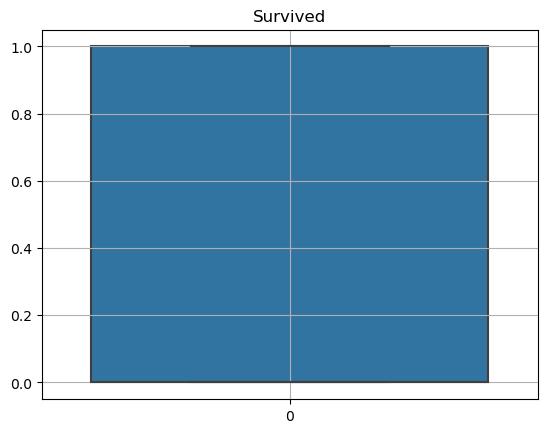

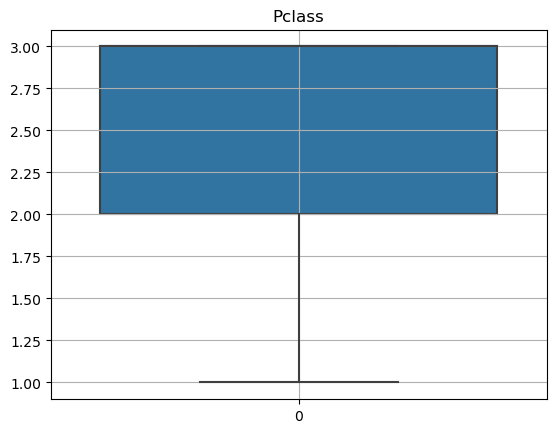

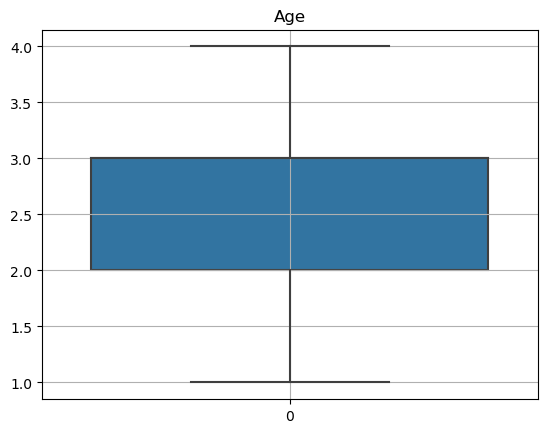

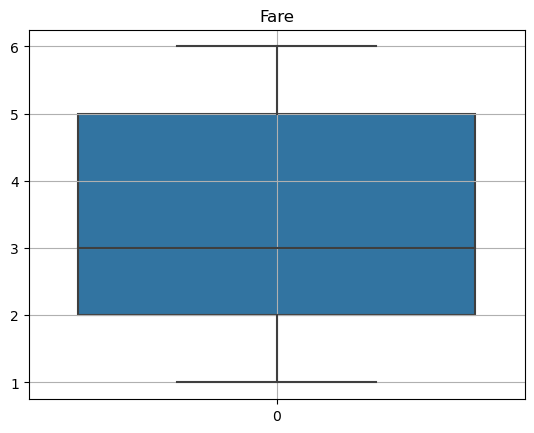

In [4]:
#Checking for outliers
categories = ['Survived', 'Pclass', 'Age', 'Fare' ]
def checking_outliers(categories):
    for c in categories:
        sns.boxplot(data=data[c])
        plt.title(f"{c}")
        plt.grid() 
        plt.show()
checking_outliers(categories)

<AxesSubplot:>

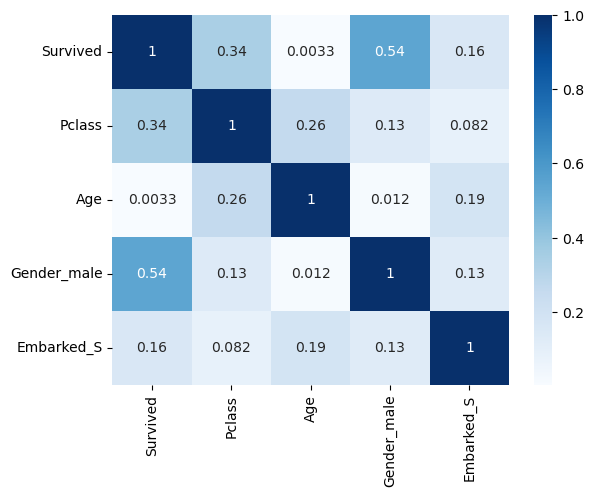

In [5]:
#Correlation heatmap
corr = abs(data.corr())
sns.heatmap(corr, annot=True, cmap='Blues')

([<matplotlib.axis.XTick at 0x27059fe9eb0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

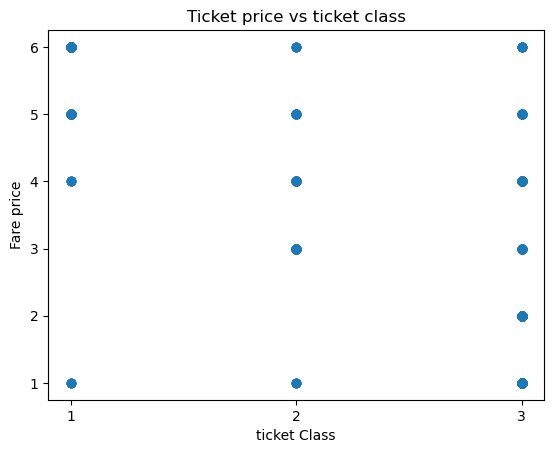

In [6]:
# Hadassa's Scatter plot to see if fare determines class
plt.scatter(x=data['Pclass'], y=data['Fare'])
plt.xlabel('ticket Class')
plt.ylabel('Fare price')
plt.title('Ticket price vs ticket class')
plt.xticks([1,2,3])

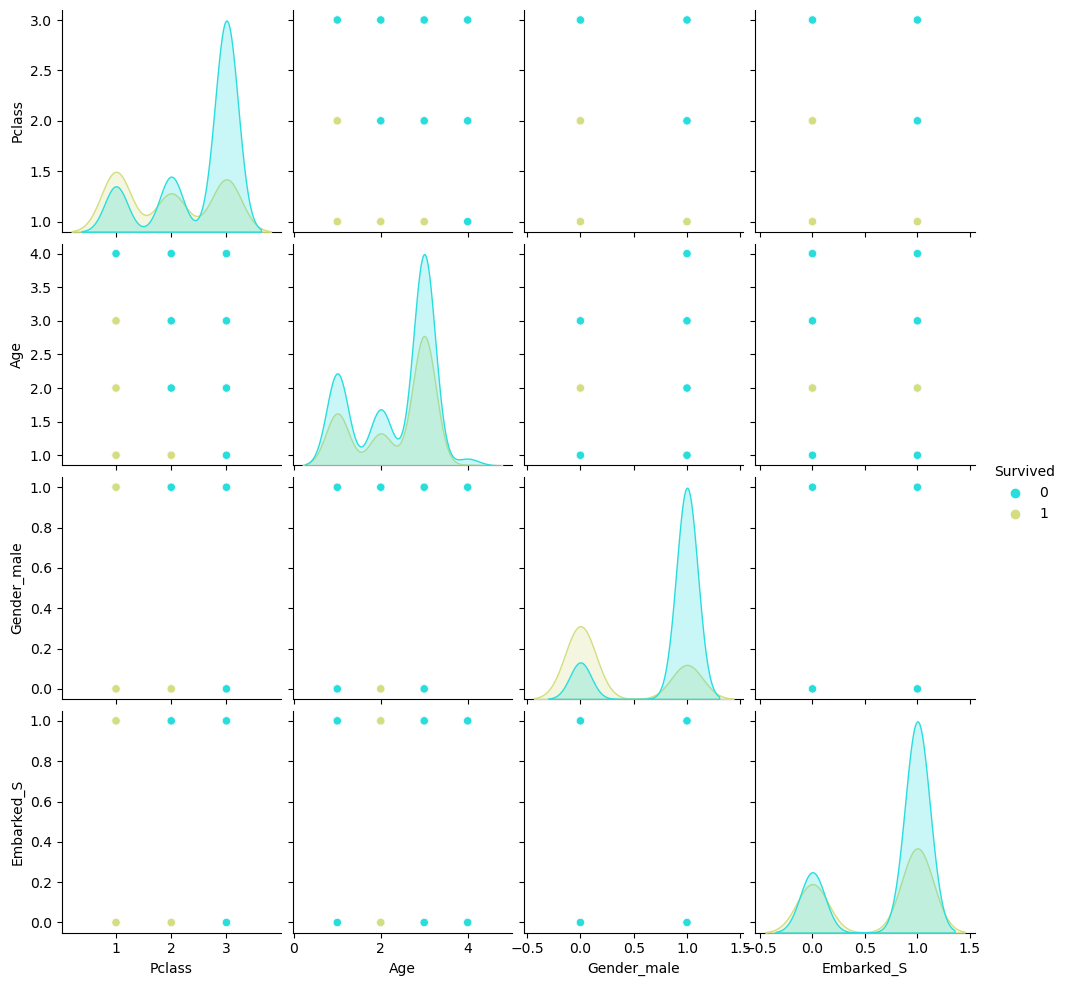

In [7]:
#Shani's pairplot to show relationship between each two columns grouped by target

sns.pairplot(data,hue='Survived',palette='rainbow')


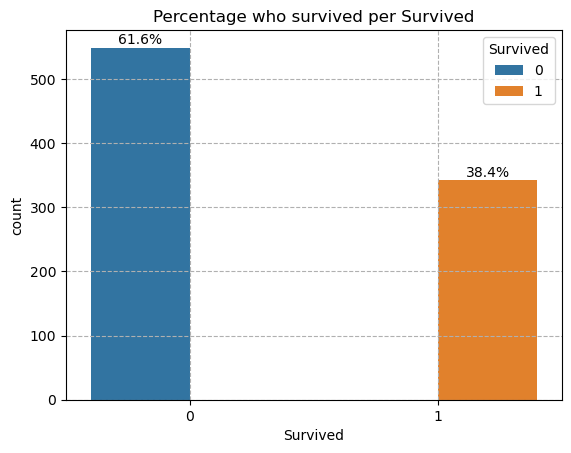

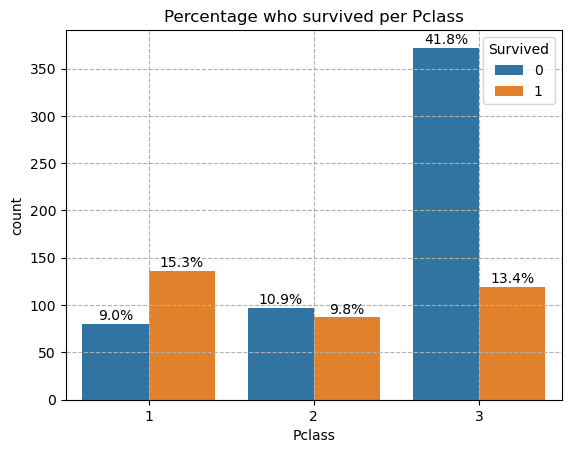

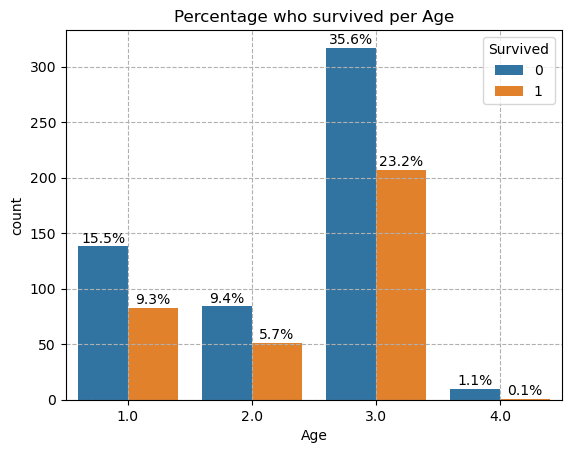

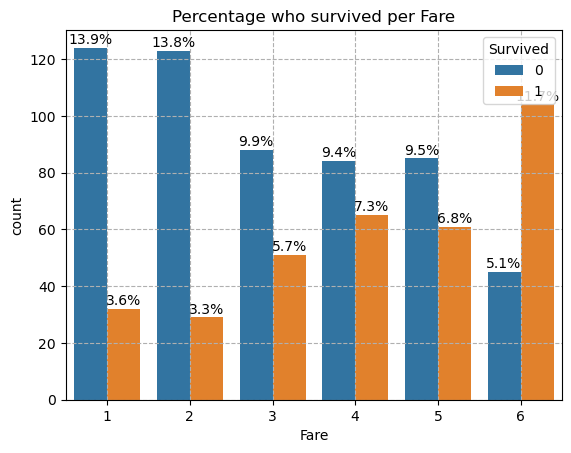

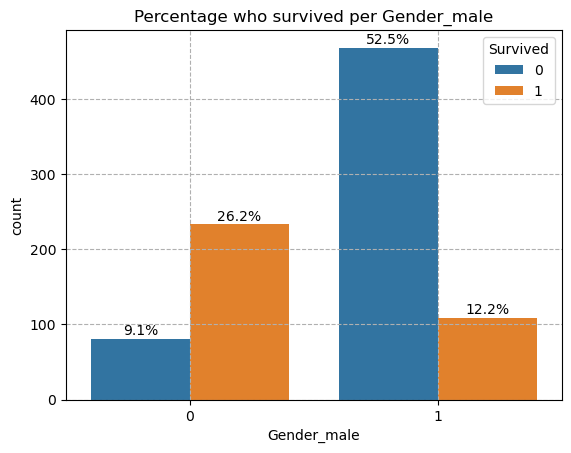

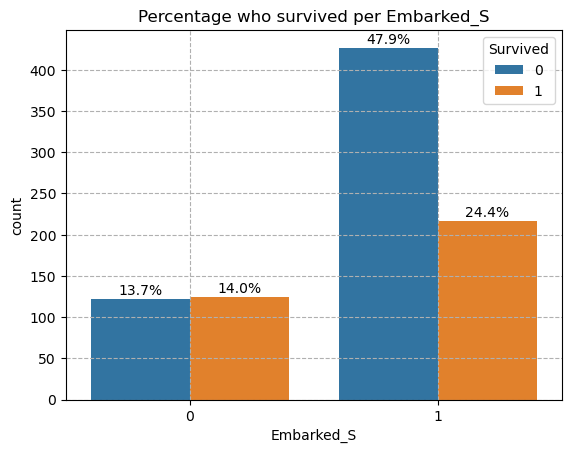

In [8]:
for each in data.columns:
    ax=sns.countplot(x=each, data=data, hue='Survived')
    plt.grid(True, linestyle='--')
    plt.title("Percentage who survived per "+ each)
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.show()